<a href="https://colab.research.google.com/github/Joooshutup/w14/blob/master/YOLOv3_multi_label_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gdown

In [3]:
from google.colab import drive
# 1. mount google drive
drive.mount('/content/drive/')

# 2. go to your /content/drive/My Drive/
%cd "/content/drive/My Drive/"

import os
if os.path.isdir("/content/drive/My Drive/PyTorch-YOLOv3-FLyingLSJ/") == False:
  # download the zip file and extract them:
  os.system("gdown --id 1kewwlkN-EN71Q-dCIGbYdBae9heccfiP -O PyTorch-YOLOv3-FLyingLSJ.zip")
  os.system("unzip PyTorch-YOLOv3-FLyingLSJ.zip")
  os.remove("PyTorch-YOLOv3-FLyingLSJ.zip")

%cd "/content/drive/My Drive/PyTorch-YOLOv3-FLyingLSJ/"


!pip install terminaltables


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive/PyTorch-YOLOv3-FLyingLSJ


In [4]:
# perform training in the 4c case
!python train_4c.py

串流輸出內容已截斷至最後 5000 行。
| h          | 0.004572     | 0.020504     | 0.088319     |
| conf       | 1.619089     | 1.016358     | 2.865003     |
| cls        | 0.475119     | 0.411495     | 0.481406     |
| conf_obj   | 0.571989     | 0.748227     | 0.654227     |
| conf_noobj | 0.008308     | 0.006621     | 0.023254     |
+------------+--------------+--------------+--------------+
Total loss 7.528169631958008
---- ETA 0:00:53.211606

---- [Epoch 2/6, Batch 24/75] ----
+------------+--------------+--------------+--------------+
| Metrics    | YOLO Layer 0 | YOLO Layer 1 | YOLO Layer 2 |
+------------+--------------+--------------+--------------+
| grid_size  | 13           | 26           | 52           |
| loss       | 2.269038     | 1.566610     | 3.326713     |
| x          | 0.060781     | 0.017333     | 0.033711     |
| y          | 0.080016     | 0.003881     | 0.079303     |
| w          | 0.026114     | 0.009325     | 0.024069     |
| h          | 0.036904     | 0.013756     | 0.023

In [5]:
# perform mAP estimation for a certain checkpoint in the 4c case

# detect cars in the 2n2c case
!python test_4c.py --weights_path checkpoints/4c/yolov3_ckpt_4.pth


/content/drive/MyDrive/PyTorch-YOLOv3-FLyingLSJ/test_4c.py:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(opt.weights_path))
Compute mAP

Namespace(image_folder='data/carsim_4c_test_images/', model_def='config/yolov3-custom_4c.cfg', weights_path='checkpoints/4c/yolov3_ckpt_5.pth', class_path='data/custom_4c/classes.names', conf_thres=0.8, nms_thres=0.4, batch_size=1, n_cpu=0, img_size=416, output_img_folder='output/4c/')
/content/drive/MyDrive/PyTorch-YOLOv3-FLyingLSJ/detect_4c.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.ad

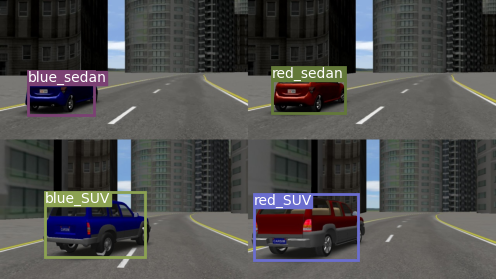

In [6]:
# detect cars in the 4c case
!python detect_4c.py
from google.colab.patches import cv2_imshow
import cv2 as cv
img_path = "./output/4c/00839.png"
img_rgb = cv.imread(img_path)
cv2_imshow(img_rgb)

In [7]:
# perform training in the 2+2c case
!python train_2n2c.py

串流輸出內容已截斷至最後 5000 行。
| h          | 0.105064     | 0.005841     | 0.024386     |
| conf       | 1.186615     | 1.004570     | 2.743939     |
| cls        | 0.569034     | 0.291896     | 0.090329     |
| conf_obj   | 0.585072     | 0.862274     | 0.834065     |
| conf_noobj | 0.005439     | 0.007706     | 0.024474     |
+------------+--------------+--------------+--------------+
Total loss 6.330548286437988
---- ETA 0:00:49.975299

---- [Epoch 2/6, Batch 24/75] ----
+------------+--------------+--------------+--------------+
| Metrics    | YOLO Layer 0 | YOLO Layer 1 | YOLO Layer 2 |
+------------+--------------+--------------+--------------+
| grid_size  | 13           | 26           | 52           |
| loss       | 1.688329     | 1.322048     | 2.971629     |
| x          | 0.049596     | 0.008527     | 0.072848     |
| y          | 0.013201     | 0.022192     | 0.043367     |
| w          | 0.024549     | 0.080508     | 0.037559     |
| h          | 0.103004     | 0.006046     | 0.035

In [8]:
# perform mAP estimation for a certain checkpoint in the 2+2c case

# detect cars in the 2n2c case
!python test_2n2c.py --weights_path checkpoints/2n2c/yolov3_ckpt_4.pth

/content/drive/MyDrive/PyTorch-YOLOv3-FLyingLSJ/test_2n2c.py:132: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(opt.weights_path))
Compute m

Namespace(image_folder='data/carsim_2n2c_test_images/', model_def='config/yolov3-custom_2n2c.cfg', weights_path='checkpoints/2n2c/yolov3_ckpt_5.pth', class_path='data/custom_2n2c/classes.names', conf_thres=0.8, nms_thres=0.4, batch_size=1, n_cpu=0, img_size=416, output_img_folder='output/2n2c/', color_class_num=2, obj_class_num=2)
/content/drive/MyDrive/PyTorch-YOLOv3-FLyingLSJ/detect_2n2c.py:58: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly all

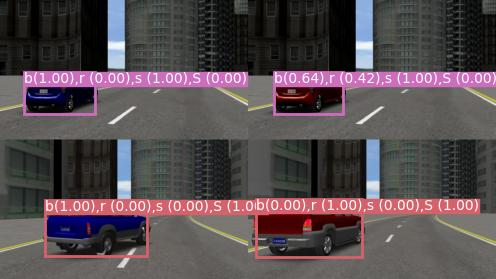

In [9]:
# detect cars in the 2n2c case
!python detect_2n2c.py
from google.colab.patches import cv2_imshow
import cv2 as cv
img_path = "./output/2n2c/00839.jpg"
img_rgb = cv.imread(img_path)
cv2_imshow(img_rgb)